In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = pd.read_csv("loans_full_schema.csv")

In [64]:
data.head(20)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.330000,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.120000,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.800000,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.890000,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.650000,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.130000,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.510000,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.840000,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.220000,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.150000,322.87,68.28,0.0


In [65]:
data.shape

(10000, 55)

In [66]:
data.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [67]:
data['emp_title']= data['emp_title'].fillna(data['emp_title'].mode()[0])
data['emp_length']= data['emp_length'].fillna(data['emp_length'].mean())

In [68]:
data.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.000000,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.000000,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.000000,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.000000,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.000000,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,manager,5.930306,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.000000,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.000000,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.000000,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.000000,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


In [69]:
data['debt_to_income'] = data['debt_to_income'].fillna(data['debt_to_income'].mean())

In [70]:
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [72]:
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [73]:
data.isnull().sum()

emp_title                              0
emp_length                             0
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                         0
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [74]:
data['annual_income_joint'].value_counts()

90000.0     31
100000.0    30
140000.0    24
105000.0    21
80000.0     20
            ..
90200.0      1
101578.0     1
155918.0     1
74120.0      1
70598.0      1
Name: annual_income_joint, Length: 596, dtype: int64

In [75]:
data.isnull().sum()

emp_title                              0
emp_length                             0
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                         0
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [76]:
data['months_since_last_delinq'].value_counts()

25.0     87
9.0      86
24.0     85
36.0     83
12.0     83
         ..
109.0     1
88.0      1
99.0      1
106.0     1
98.0      1
Name: months_since_last_delinq, Length: 97, dtype: int64

In [77]:
data['months_since_last_delinq'].describe()

count    4342.000000
mean       36.760709
std        21.634939
min         1.000000
25%        19.000000
50%        34.000000
75%        53.000000
max       118.000000
Name: months_since_last_delinq, dtype: float64

In [78]:
data['months_since_last_delinq'] = data['months_since_last_delinq'].fillna(data['months_since_last_delinq'].mean())

In [79]:
data['months_since_90d_late'].value_counts()

34.0     48
45.0     45
60.0     44
72.0     43
67.0     43
         ..
113.0     1
2.0       1
102.0     1
115.0     1
98.0      1
Name: months_since_90d_late, Length: 106, dtype: int64

In [80]:
data['months_since_90d_late'] = data['months_since_90d_late'].fillna(0)

In [81]:
data.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.000000,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.000000,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.000000,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.000000,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.000000,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,manager,5.930306,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.000000,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.000000,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.000000,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.000000,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


In [82]:
data.isnull().sum()

emp_title                              0
emp_length                             0
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                         0
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq               0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late                  0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [83]:
data['months_since_last_credit_inquiry'].value_counts()

1.0     796
2.0     740
0.0     693
3.0     663
4.0     651
5.0     576
6.0     554
7.0     510
8.0     473
9.0     385
10.0    375
11.0    279
13.0    268
12.0    247
14.0    226
15.0    215
16.0    183
18.0    172
17.0    166
19.0    131
21.0    108
20.0    106
22.0    103
23.0     76
24.0     33
Name: months_since_last_credit_inquiry, dtype: int64

In [84]:
data['months_since_last_credit_inquiry'] = data['months_since_last_credit_inquiry'].fillna(data['months_since_last_credit_inquiry'].mean())

In [85]:
data['num_accounts_120d_past_due'].value_counts()

0.0    9682
Name: num_accounts_120d_past_due, dtype: int64

In [86]:
data['num_accounts_120d_past_due'] = data['num_accounts_120d_past_due'].fillna(0.0)

In [93]:
data.isnull().sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_d

In [95]:
data.select_dtypes('number').columns

Index(['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'balance',
       'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fe

C:\Users\lenovo pc\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo pc\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Range')

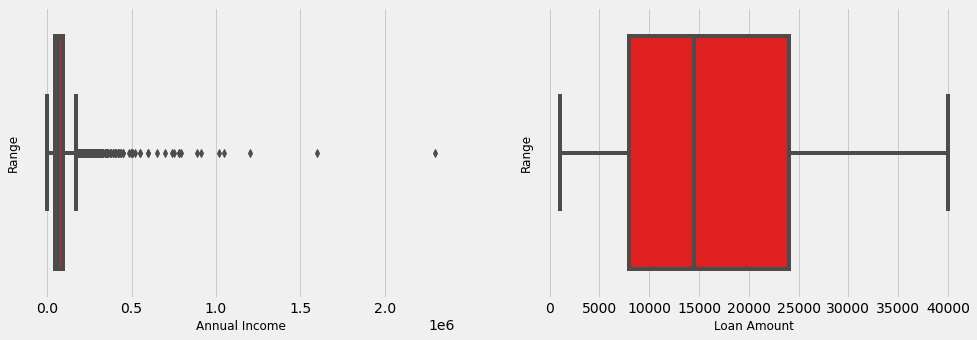

In [105]:
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight')

#Box plot for Employee length
plt.subplot(1,2,1)
sns.boxplot(data['annual_income'], color='red')
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Range', fontsize=12)

#Box plt for Loan Amount
plt.subplot(1,2,2)
sns.boxplot(data['loan_amount'], color='red')
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Range', fontsize=12)

In [57]:
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.000000,2001,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,36.760709,1996,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.000000,2006,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,36.760709,2007,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,36.760709,2008,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [106]:
data = data[data['annual_income'] < 60000]

C:\Users\lenovo pc\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo pc\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Range')

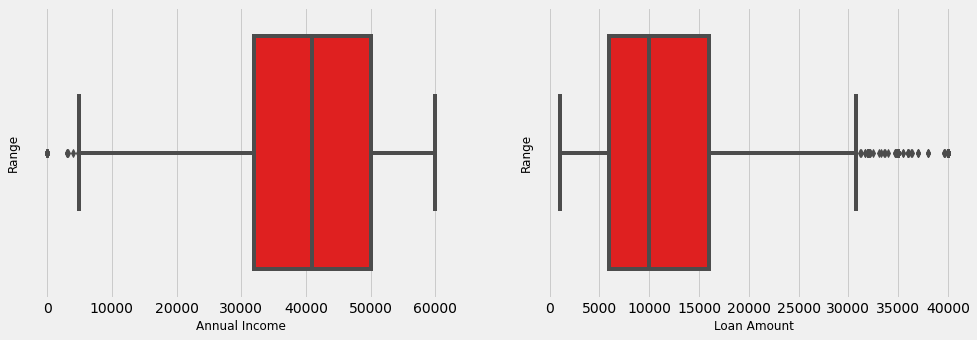

In [107]:
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight')

#Box plot for Employee length
plt.subplot(1,2,1)
sns.boxplot(data['annual_income'], color='red')
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Range', fontsize=12)

#Box plt for Loan Amount
plt.subplot(1,2,2)
sns.boxplot(data['loan_amount'], color='red')
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Range', fontsize=12)

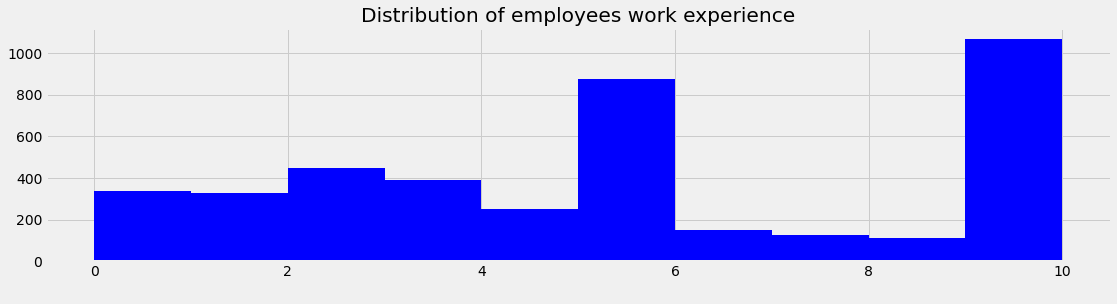

In [113]:
#Work experience visualization using histogram
plt.rcParams['figure.figsize'] = (17,4)
plt.hist(data['emp_length'], color='blue')
plt.xlabel(' ', fontsize=14)
plt.title('Distribution of employees work experience')
plt.show()

In [114]:
data['emp_title'].value_counts()

manager                     675
teacher                      98
owner                        70
driver                       60
office manager               36
                           ... 
service deli                  1
culity control                1
service writer                1
children's social worker      1
da coordinator                1
Name: emp_title, Length: 2103, dtype: int64

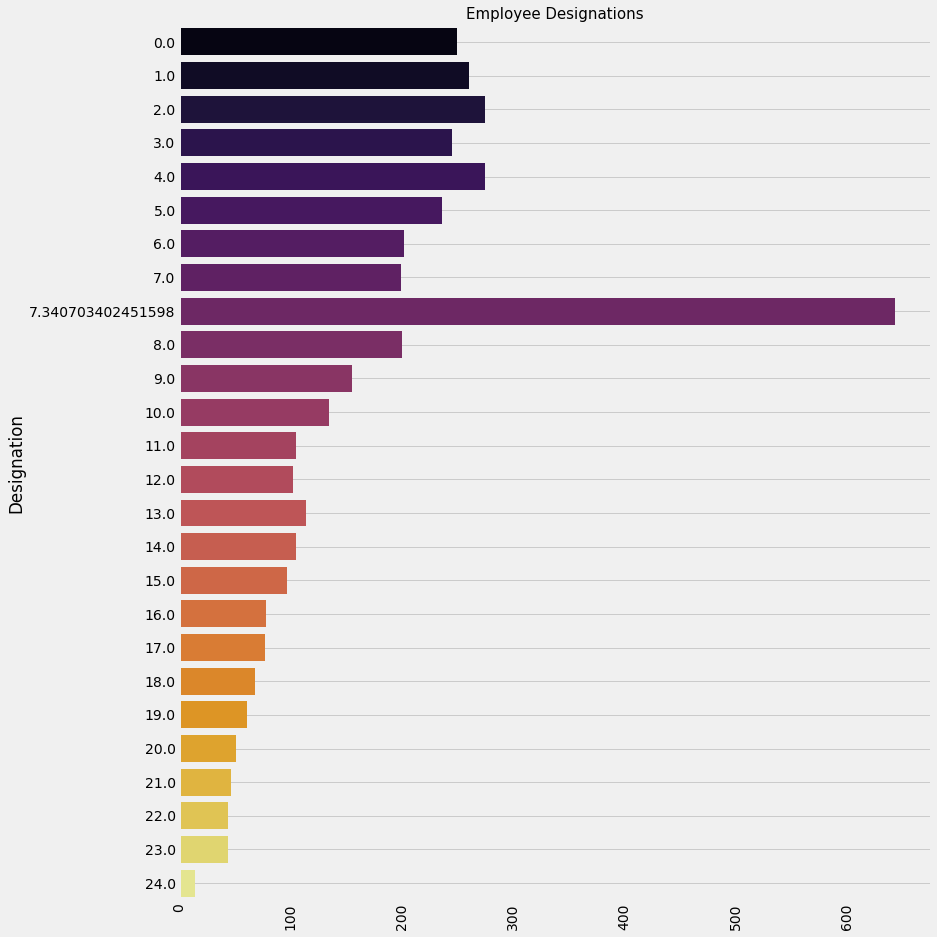

In [119]:

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = data['months_since_last_credit_inquiry'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Months')
plt.title('Months since last credit inquiry', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

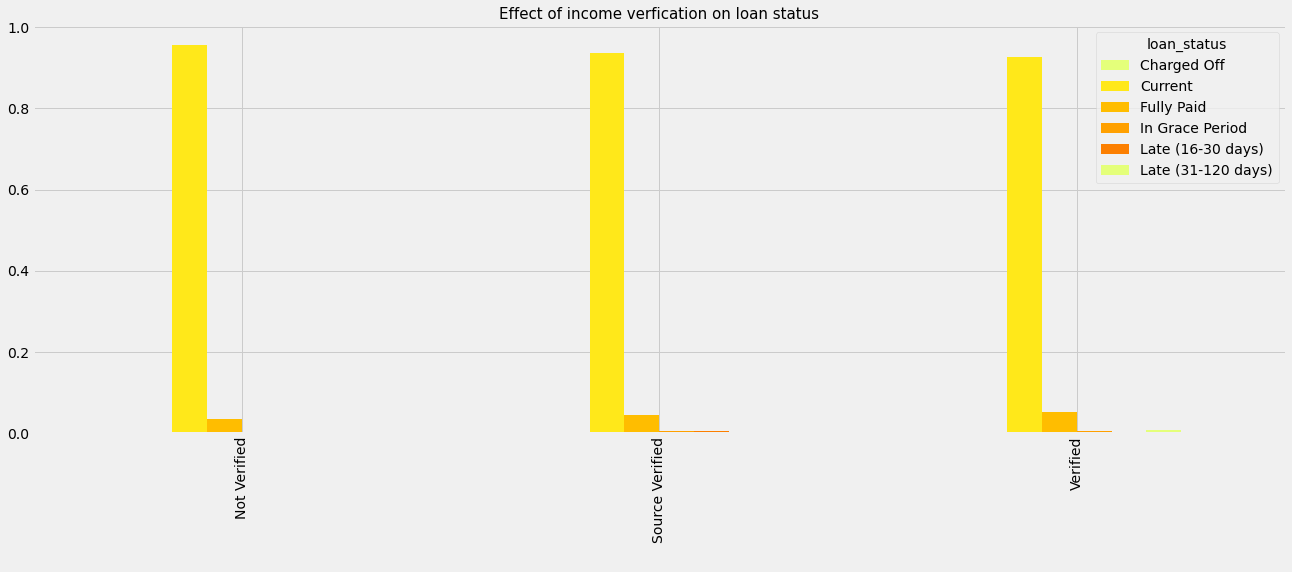

In [129]:
#Bivariate analysis
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 7)
x = pd.crosstab(data['verified_income'], data['loan_status'])
colors1 = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color=colors1)
plt.title('Effect of income verfication on loan status', fontsize = 15)
plt.xlabel(' ')
plt.show()

In [124]:
data.select_dtypes('object').columns

Index(['emp_title', 'state', 'homeownership', 'verified_income',
       'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month',
       'loan_status', 'initial_listing_status', 'disbursement_method'],
      dtype='object')

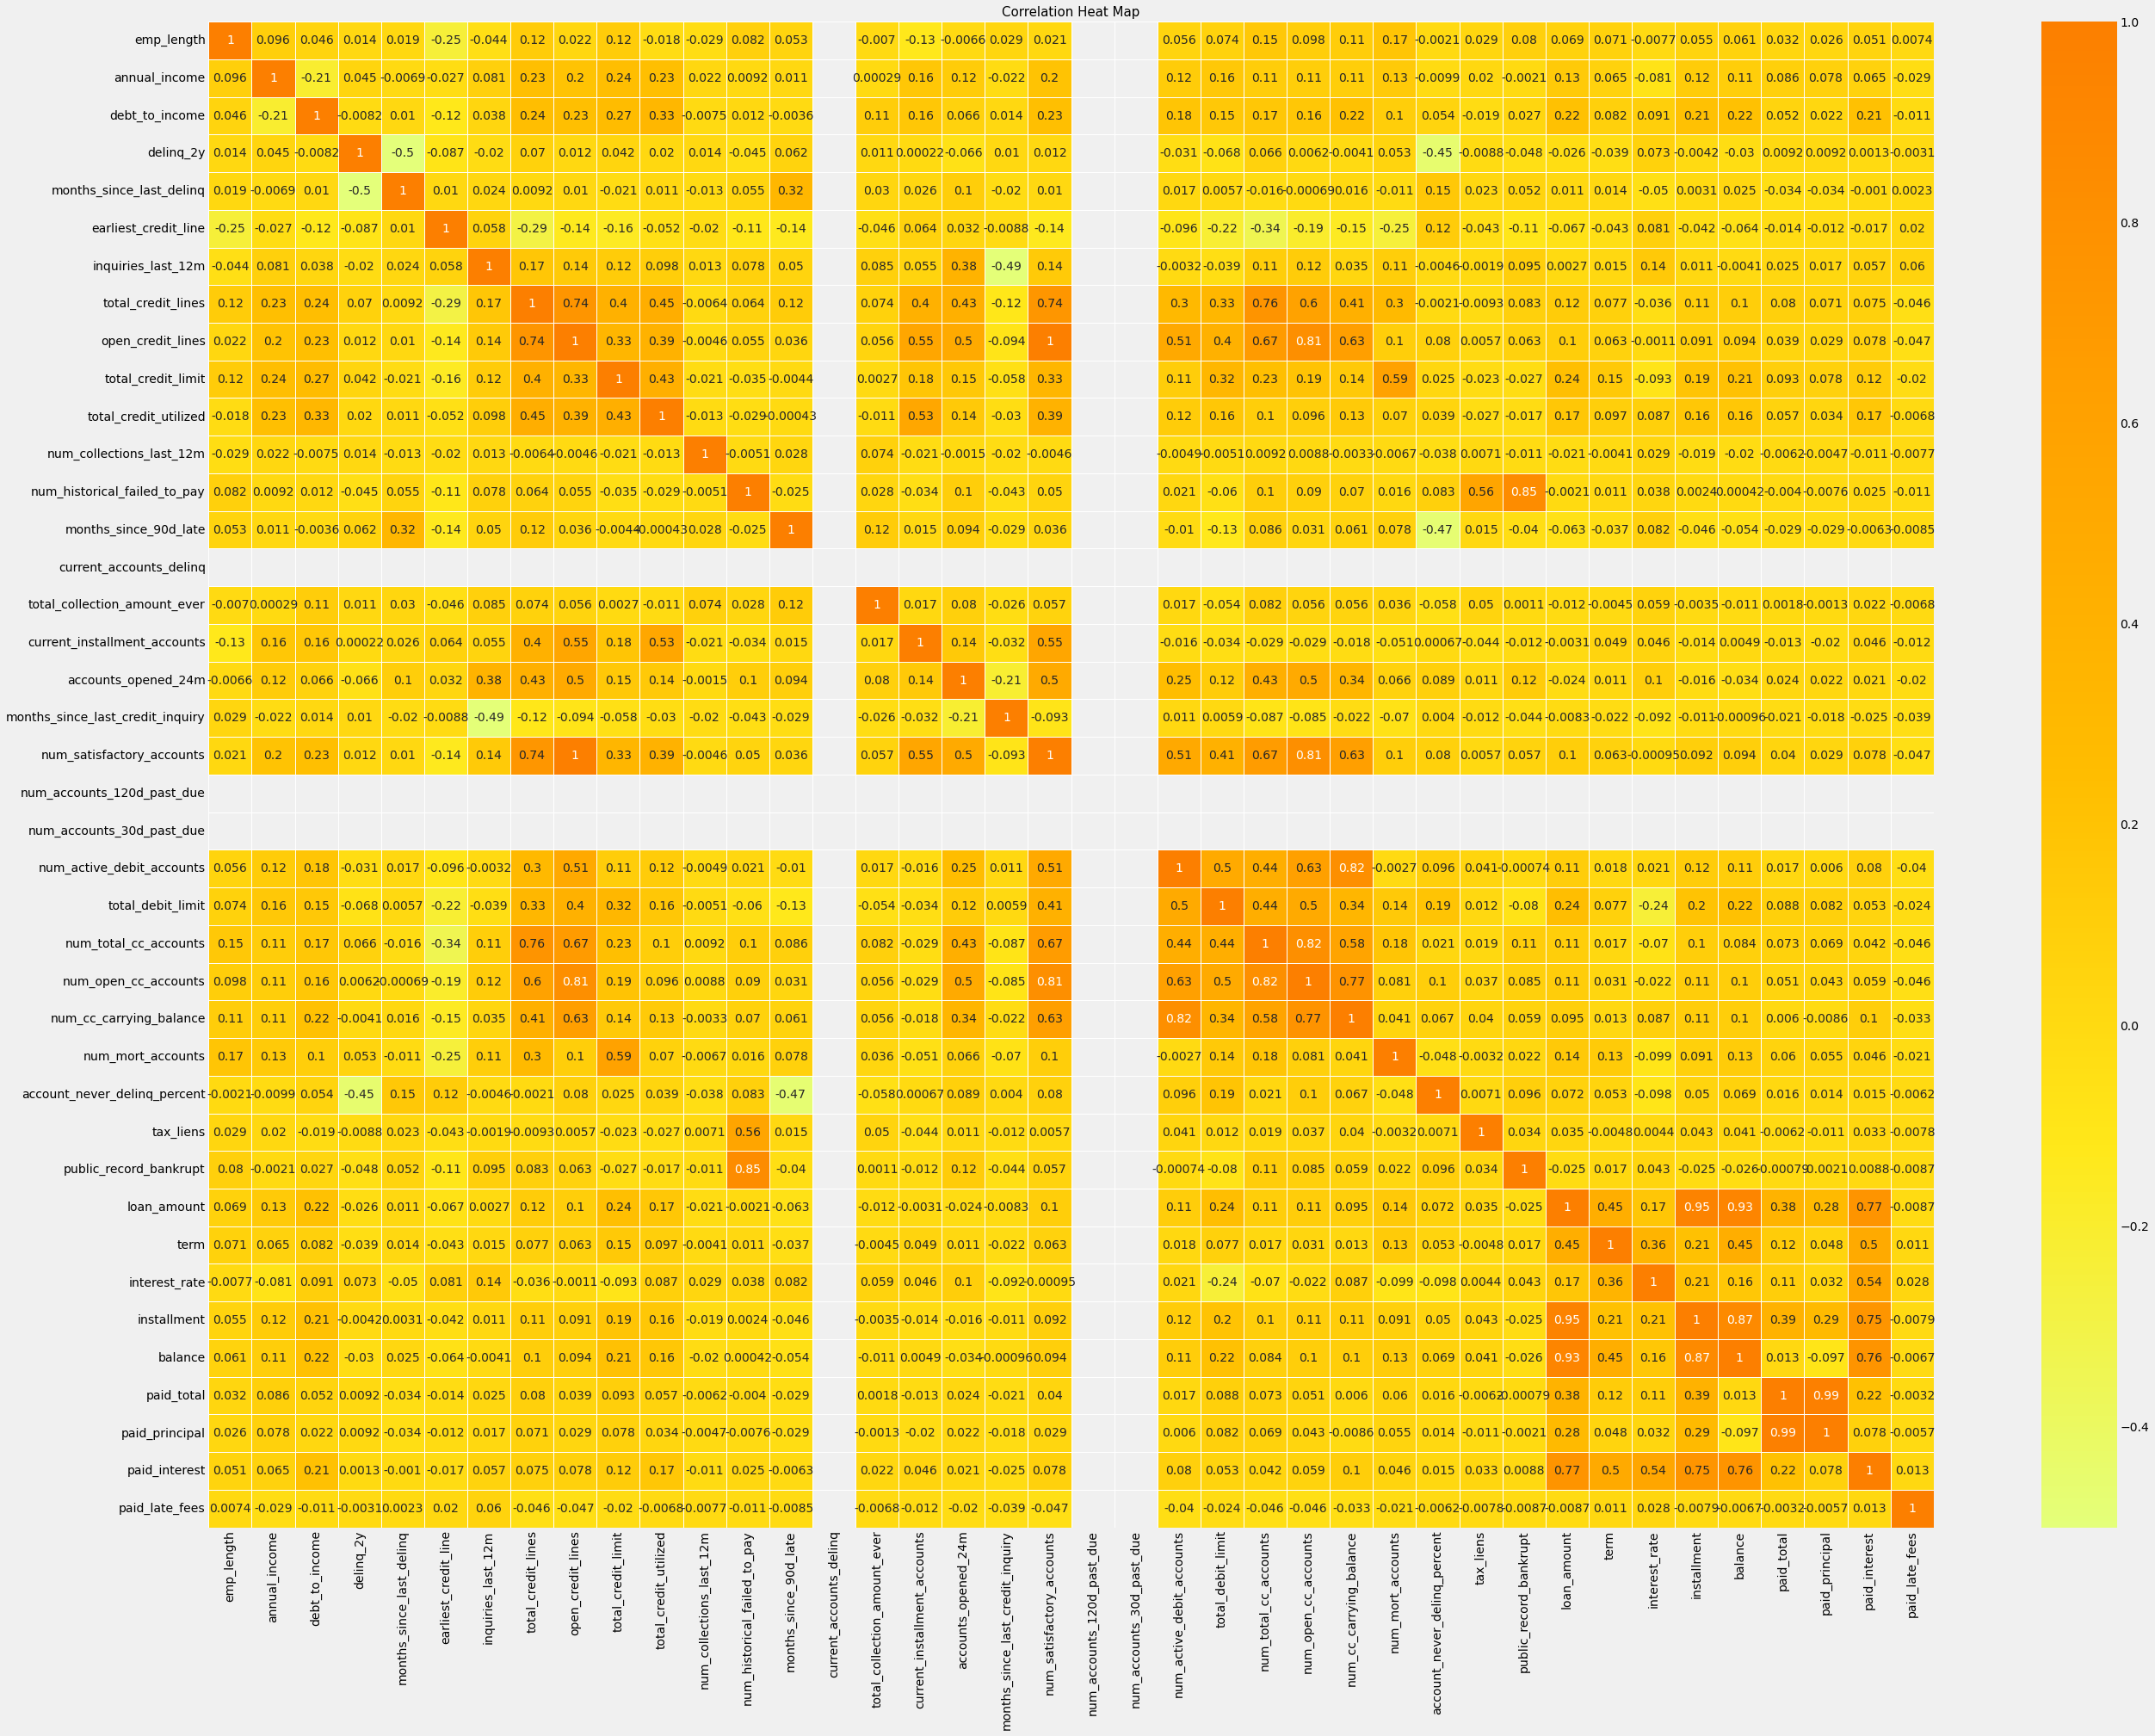

In [135]:
plt.rcParams['figure.figsize'] = (40, 30)
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [136]:
data = data.drop('num_open_cc_accounts', axis=1)

In [137]:
data = data.drop('balance', axis=1)

In [138]:
data = data.drop('paid_interest', axis=1)

In [139]:
data = data.drop('num_active_debit_accounts', axis=1)

In [140]:
data = data.drop('num_satisfactory_accounts', axis=1)

In [141]:
data.select_dtypes('object').columns

Index(['emp_title', 'state', 'homeownership', 'verified_income',
       'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month',
       'loan_status', 'initial_listing_status', 'disbursement_method'],
      dtype='object')

In [142]:
data = data.drop('state', axis=1)

In [143]:
data = data.drop('grade', axis=1)

In [144]:
data = data.drop('sub_grade', axis=1)

In [145]:
data = data.drop('disbursement_method', axis=1)

In [146]:
data.select_dtypes('object').columns

Index(['emp_title', 'homeownership', 'verified_income', 'loan_purpose',
       'application_type', 'issue_month', 'loan_status',
       'initial_listing_status'],
      dtype='object')

In [147]:
data = data.drop('loan_purpose', axis=1)

In [148]:
data['application_type'].value_counts()

individual    3238
joint          844
Name: application_type, dtype: int64

In [149]:
data['emp_title'].value_counts()

manager                     675
teacher                      98
owner                        70
driver                       60
office manager               36
                           ... 
service deli                  1
culity control                1
service writer                1
children's social worker      1
da coordinator                1
Name: emp_title, Length: 2103, dtype: int64

In [150]:
data['emp_title'].describe()

count        4082
unique       2103
top       manager
freq          675
Name: emp_title, dtype: object

In [154]:
data= data.drop('emp_title', axis=1)

In [155]:
data.select_dtypes('object').columns

Index(['homeownership', 'verified_income', 'application_type', 'issue_month',
       'loan_status', 'initial_listing_status'],
      dtype='object')

In [156]:
data['issue_month'].describe()

count         4082
unique           3
top       Mar-2018
freq          1483
Name: issue_month, dtype: object

In [157]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['homeownership'] = le.fit_transform(data['homeownership'])
data['verified_income'] = le.fit_transform(data['verified_income'])
data['issue_month'] = le.fit_transform(data['issue_month'])

In [158]:
data['application_type'].value_counts()

individual    3238
joint          844
Name: application_type, dtype: int64

In [159]:
data['application_type'] = data['application_type'].replace(('individual', 'joint'), ('1', '0'))

In [160]:
data['loan_status'].value_counts()

Current               3842
Fully Paid             179
Late (31-120 days)      21
In Grace Period         21
Late (16-30 days)       16
Charged Off              3
Name: loan_status, dtype: int64

In [161]:
data['loan_status'] = le.fit_transform(data['loan_status'])

In [165]:
data['initial_listing_status'].value_counts()

whole         3242
fractional     840
Name: initial_listing_status, dtype: int64

In [170]:
data['initial_listing_status'] = data['initial_listing_status'].replace(('whole', 'fractional'), ('1', '0'))

In [171]:
data.head()

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,term,interest_rate,installment,issue_month,loan_status,initial_listing_status,paid_total,paid_principal,paid_late_fees,intitial_listing_status
1,10.000000,2,40000.0,0,5.04,0,36.760709,1996,1,30,...,36,12.61,167.54,0,1,1,499.12,348.63,0.0,1
2,3.000000,2,40000.0,1,21.15,0,28.000000,2006,4,31,...,36,17.09,71.40,0,1,0,281.80,175.37,0.0,0
3,1.000000,2,30000.0,0,10.16,0,36.760709,2007,0,4,...,36,6.72,664.19,1,1,1,3312.89,2746.74,0.0,1
4,10.000000,2,35000.0,2,57.96,0,36.760709,2008,7,22,...,36,14.07,786.87,2,1,1,2324.65,1569.85,0.0,1
5,5.930306,1,34000.0,0,6.46,1,3.000000,1990,6,32,...,36,6.72,153.75,1,1,1,873.13,743.29,0.0,1


In [172]:
data.select_dtypes('object').columns

Index(['application_type', 'initial_listing_status',
       'intitial_listing_status'],
      dtype='object')

In [173]:
data = data.drop('intitial_listing_status', axis=1)

In [174]:
data.head()

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,issue_month,loan_status,initial_listing_status,paid_total,paid_principal,paid_late_fees
1,10.000000,2,40000.0,0,5.04,0,36.760709,1996,1,30,...,5000,36,12.61,167.54,0,1,1,499.12,348.63,0.0
2,3.000000,2,40000.0,1,21.15,0,28.000000,2006,4,31,...,2000,36,17.09,71.40,0,1,0,281.80,175.37,0.0
3,1.000000,2,30000.0,0,10.16,0,36.760709,2007,0,4,...,21600,36,6.72,664.19,1,1,1,3312.89,2746.74,0.0
4,10.000000,2,35000.0,2,57.96,0,36.760709,2008,7,22,...,23000,36,14.07,786.87,2,1,1,2324.65,1569.85,0.0
5,5.930306,1,34000.0,0,6.46,1,3.000000,1990,6,32,...,5000,36,6.72,153.75,1,1,1,873.13,743.29,0.0


In [175]:
target = data['interest_rate']

In [176]:
data = data.drop('interest_rate', axis =1)

In [177]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.2, random_state=4)

In [178]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [179]:
Xtrain.shape, Xtest.shape

((3265, 40), (817, 40))

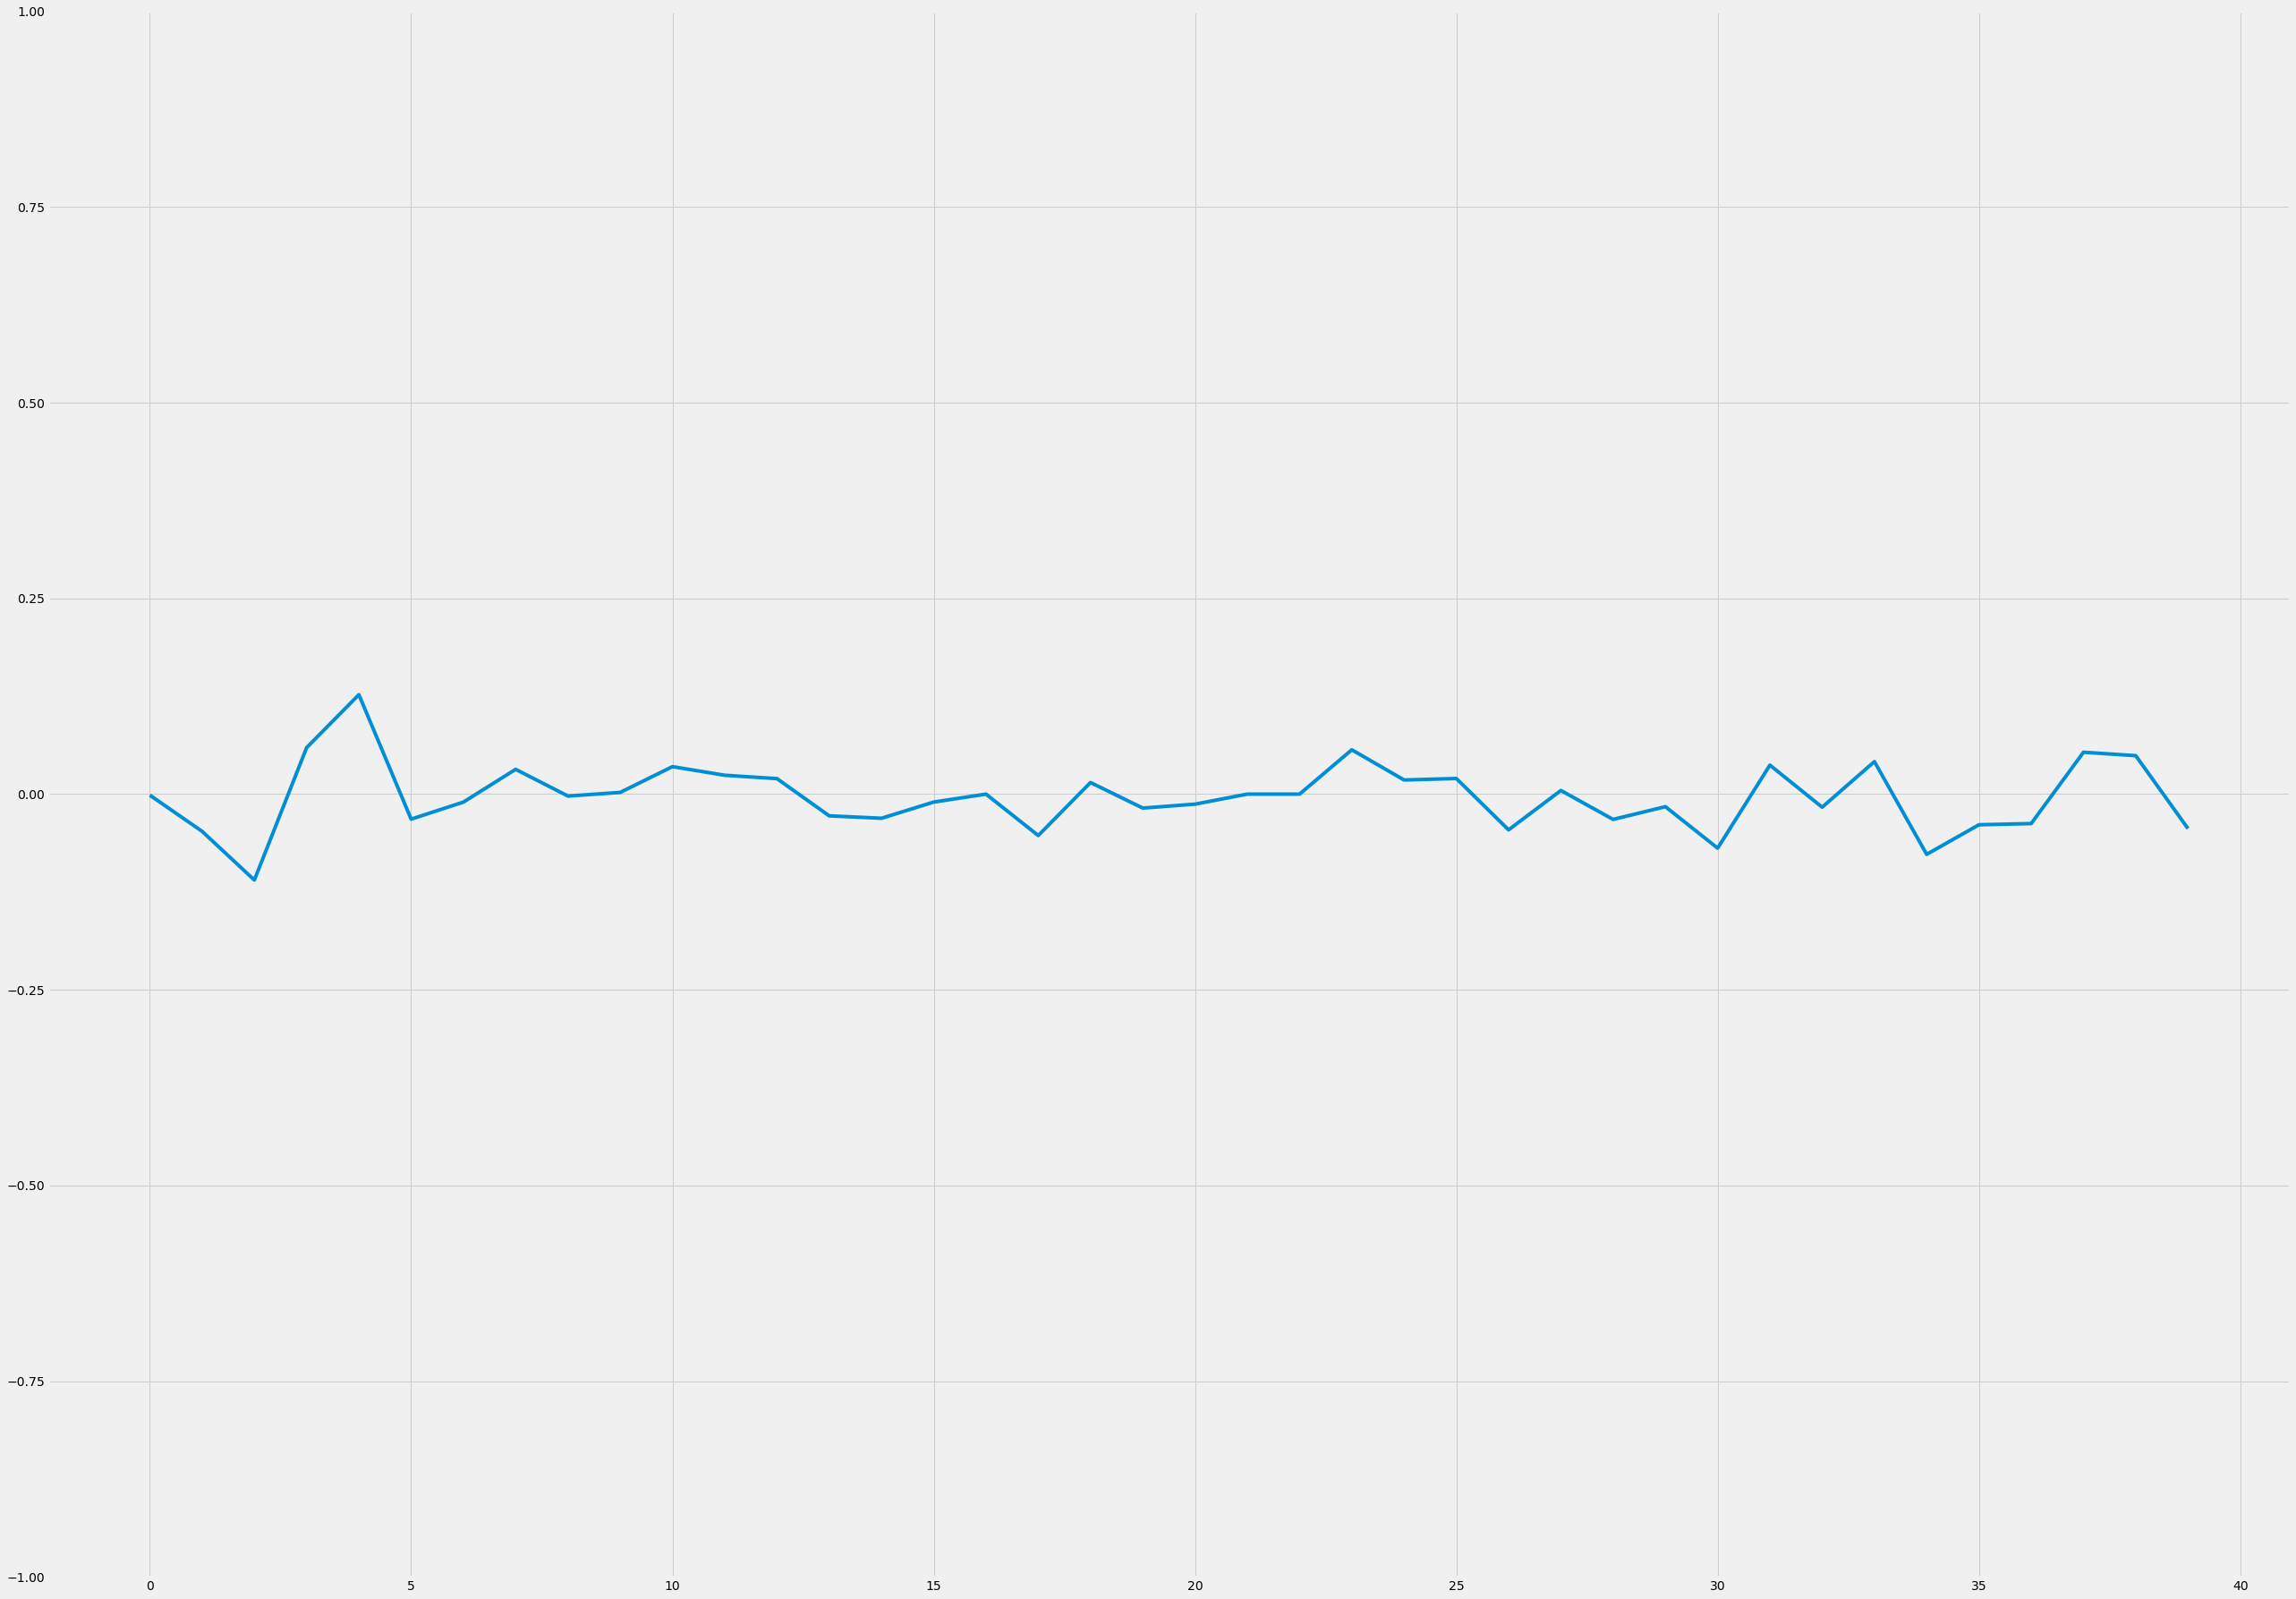

In [181]:
plt.ylim(-1,1)

means = []
for i in range(data.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

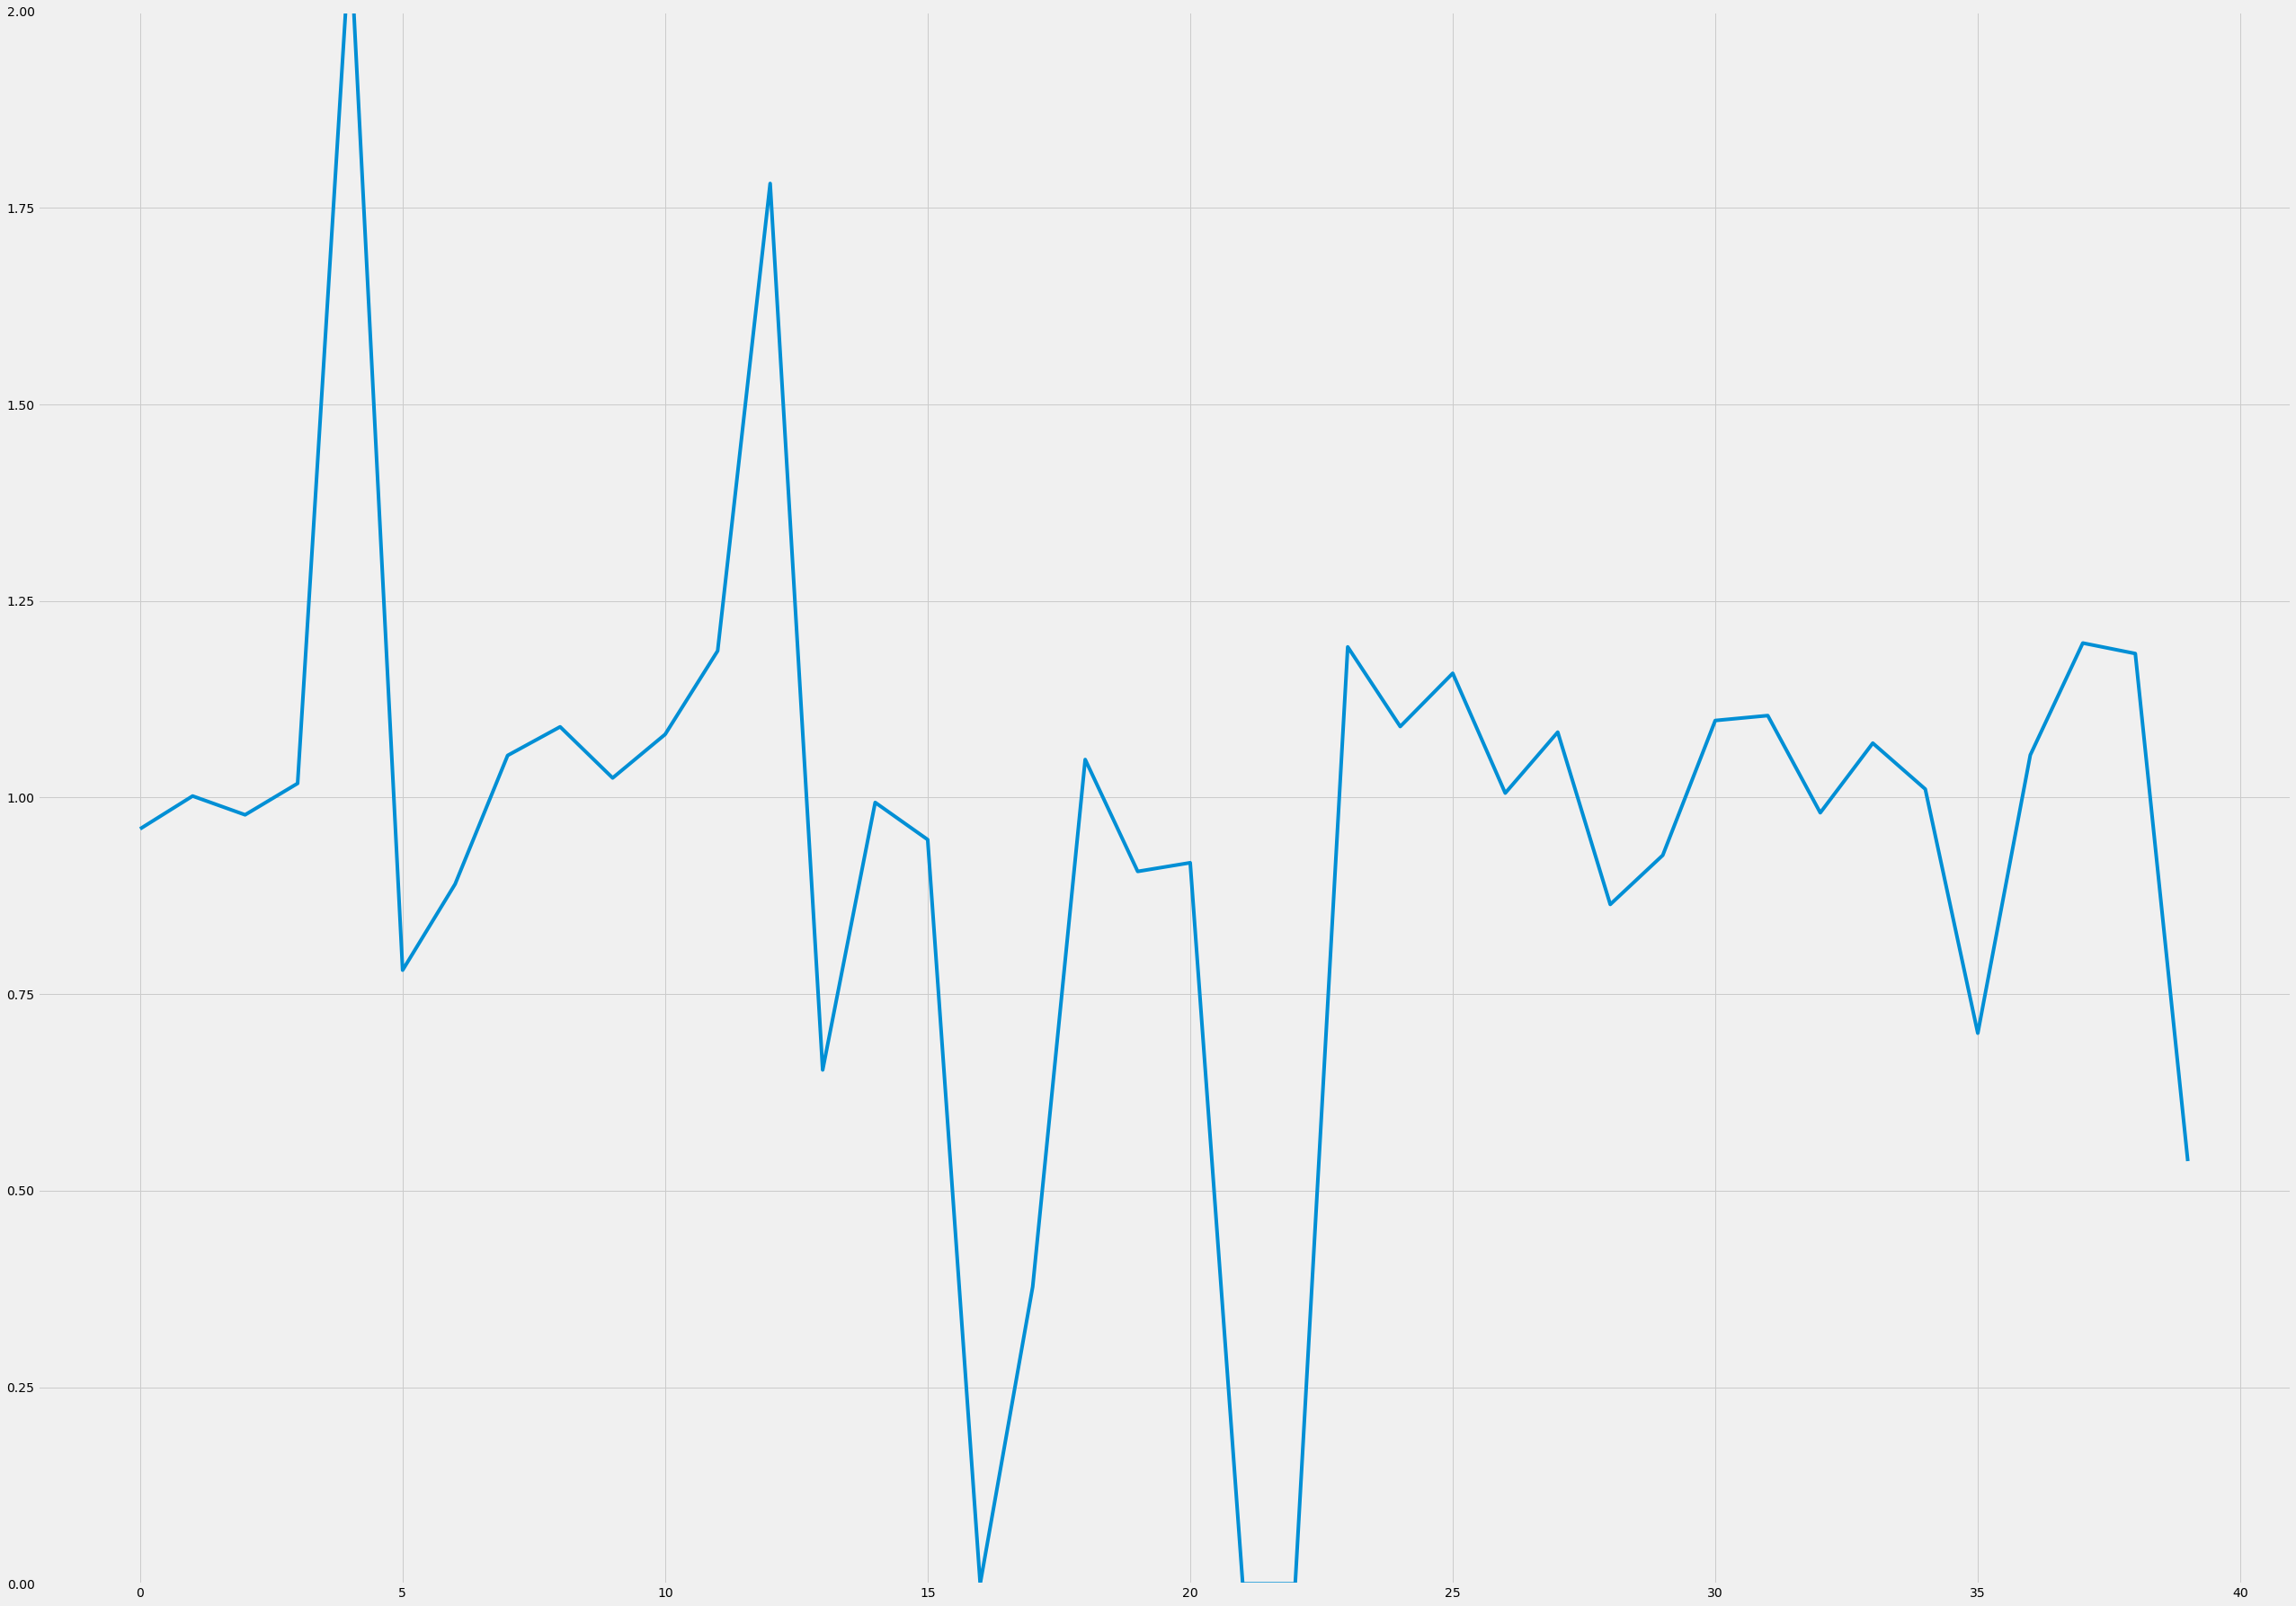

In [182]:
plt.ylim(0,2)

vars = []
for i in range(data.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

model = LinearRegression()
rfecv = RFECV(model, step=1, min_features_to_select=22, n_jobs=-1)
rfecv.fit(Xtrain, Ytrain)

RFECV(estimator=LinearRegression(), min_features_to_select=22, n_jobs=-1)

In [184]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [185]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [186]:
selected_features= np.where(rfecv.support_)[0]
Xtrain = Xtrain[:,selected_features]
Xtest = Xtest[:,selected_features]

In [187]:
model.fit(Xtrain,Ytrain)

LinearRegression()

In [188]:
model.coef_

array([-2.64231984e-02,  2.32741802e-01, -3.59861326e-01,  3.64108069e-01,
        8.52361517e-02,  3.95249505e-02, -2.42869457e-01, -1.44432794e-02,
        2.20463390e-01, -5.12148019e-02, -2.43404373e-01, -9.39788911e-03,
        3.04428480e-01,  1.31926345e-01,  3.67731988e+12,  8.72130875e-02,
        7.35887231e+09,  8.23951332e-02, -2.13898119e-02,  3.11286313e-01,
       -1.35202663e-01, -1.49193107e+09, -1.03716252e+09, -5.74685480e-01,
       -2.98409369e-01,  5.67471272e-01, -1.23076339e-01, -1.99785203e-01,
       -1.98898926e+12, -3.06476289e+12, -2.97553872e-03, -1.13863966e+01,
        3.77184376e+00,  8.93667793e+00,  4.95462200e-01,  4.43830765e-01,
       -5.47105339e-01,  1.97388606e+01, -1.89839027e+01, -1.10658568e-01])

In [189]:
model.intercept_

13.001264268282712

In [190]:
model.predict(Xtest[10,:].reshape(1,-1))

array([17.15043419])

In [191]:
model.score(Xtest,Ytest)

0.6858326863537989